# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
#url = "http://api.openweathermap.org/data/2.5/weather?"
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID="

# Define your OpenWeatherMap API key
api_key = "7068286e49e912939a426fa53651ccc2"  

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = f"{url}?q={city}&appid={api_key}"
    city_url = url + api_key + "&q=" + city
    print(city_url)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Make the API request
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping... {e}")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

# Optionally, print the retrieved city data
print(city_data)

Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=port mathurin
Processing Record 1 of Set 1 | port mathurin
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=punta arenas
Processing Record 2 of Set 1 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=puerto natales
Processing Record 3 of Set 1 | puerto natales
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=port-aux-francais
Processing Record 4 of Set 1 | port-aux-francais
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=choibalsan
Processing Record 5 of Set 1 | choibalsan
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=yellowknife
Processing Record 6 of Se

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=port elizabeth
Processing Record 3 of Set 2 | port elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=mirnyy
Processing Record 4 of Set 2 | mirnyy
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=queenstown
Processing Record 5 of Set 2 | queenstown
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=ilulissat
Processing Record 6 of Set 2 | ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=colonia
Processing Record 7 of Set 2 | colonia
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=qaqortoq
Processing Record 8 of Set 2 | qaqortoq
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426f

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=juneau
Processing Record 6 of Set 3 | juneau
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=hihya
Processing Record 7 of Set 3 | hihya
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=cascais
Processing Record 8 of Set 3 | cascais
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=monteagudo
Processing Record 9 of Set 3 | monteagudo
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=bramming
Processing Record 10 of Set 3 | bramming
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=duncan town
Processing Record 11 of Set 3 | duncan town
City not found. Skipping... 'coord'
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPI

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=gadzhiyevo
Processing Record 11 of Set 4 | gadzhiyevo
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=port alfred
Processing Record 12 of Set 4 | port alfred
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=la ronge
Processing Record 13 of Set 4 | la ronge
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=togur
Processing Record 14 of Set 4 | togur
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=simanggang
Processing Record 15 of Set 4 | simanggang
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=flin flon
Processing Record 16 of Set 4 | flin flon
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=avarua
Processing Record 15 of Set 5 | avarua
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=choma
Processing Record 16 of Set 5 | choma
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=amasra
Processing Record 17 of Set 5 | amasra
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=chokwe
Processing Record 18 of Set 5 | chokwe
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=fortuna
Processing Record 19 of Set 5 | fortuna
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=port lincoln
Processing Record 20 of Set 5 | port lincoln
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=kalmu

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=peace river
Processing Record 18 of Set 6 | peace river
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=pachino
Processing Record 19 of Set 6 | pachino
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=nagqu
Processing Record 20 of Set 6 | nagqu
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=jinghong
Processing Record 21 of Set 6 | jinghong
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=gouyave
Processing Record 22 of Set 6 | gouyave
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=ingeniero jacobacci
Processing Record 23 of Set 6 | ingeniero jacobacci
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49

City not found. Skipping... 'coord'
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=amga
Processing Record 21 of Set 7 | amga
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=port antonio
Processing Record 22 of Set 7 | port antonio
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=pisco
Processing Record 23 of Set 7 | pisco
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=ekuvukeni
Processing Record 24 of Set 7 | ekuvukeni
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=labrador city
Processing Record 25 of Set 7 | labrador city
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=upington
Processing Record 26 of Set 7 | upington
http://api.openweathermap.org/data/2.5/weather?units

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=kurchatov
Processing Record 25 of Set 8 | kurchatov
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=lazaro cardenas
Processing Record 26 of Set 8 | lazaro cardenas
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=kannapolis
Processing Record 27 of Set 8 | kannapolis
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=touros
Processing Record 28 of Set 8 | touros
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=luau
Processing Record 29 of Set 8 | luau
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=tabas
Processing Record 30 of Set 8 | tabas
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa536

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=kampung sungai ara
Processing Record 29 of Set 9 | kampung sungai ara
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=la plata
Processing Record 30 of Set 9 | la plata
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=santa marta de ortigueira
Processing Record 31 of Set 9 | santa marta de ortigueira
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=trevelin
Processing Record 32 of Set 9 | trevelin
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=tarfaya
Processing Record 33 of Set 9 | tarfaya
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=bonthe
Processing Record 34 of Set 9 | bonthe
http://api.openweathermap.org/data/2.5/weather

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=sindirgi
Processing Record 32 of Set 10 | sindirgi
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=rio rancho
Processing Record 33 of Set 10 | rio rancho
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=banda aceh
Processing Record 34 of Set 10 | banda aceh
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=alpine
Processing Record 35 of Set 10 | alpine
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=bakanas
Processing Record 36 of Set 10 | bakanas
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=pimentel
Processing Record 37 of Set 10 | pimentel
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a42

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=salekhard
Processing Record 36 of Set 11 | salekhard
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=carolina beach
Processing Record 37 of Set 11 | carolina beach
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=caister-on-sea
Processing Record 38 of Set 11 | caister-on-sea
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=luza
Processing Record 39 of Set 11 | luza
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=san antonio del estrecho
Processing Record 40 of Set 11 | san antonio del estrecho
City not found. Skipping... 'coord'
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=sorong
Processing Record 41 of Set 11 | sorong
http:/

http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=emerald
Processing Record 38 of Set 12 | emerald
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=reggane
Processing Record 39 of Set 12 | reggane
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=am timan
Processing Record 40 of Set 12 | am timan
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=tchintabaraden
Processing Record 41 of Set 12 | tchintabaraden
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=freetown
Processing Record 42 of Set 12 | freetown
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e912939a426fa53651ccc2&q=micheweni
Processing Record 43 of Set 12 | micheweni
http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=7068286e49e9

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
record_count = city_data_df.count()
print(record_count)

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64


In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port mathurin,-19.6833,63.4167,26.17,80,89,4.20,MU,1701786409
1,punta arenas,-53.1500,-70.9167,8.06,39,40,10.29,CL,1701786549
2,puerto natales,-51.7236,-72.4875,10.25,46,20,8.75,CL,1701786549
3,port-aux-francais,-49.3500,70.2167,4.12,77,97,7.28,TF,1701786549
4,choibalsan,48.0667,114.5000,-12.94,63,97,8.67,MN,1701786549


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port mathurin,-19.6833,63.4167,26.17,80,89,4.20,MU,1701786409
1,punta arenas,-53.1500,-70.9167,8.06,39,40,10.29,CL,1701786549
2,puerto natales,-51.7236,-72.4875,10.25,46,20,8.75,CL,1701786549
3,port-aux-francais,-49.3500,70.2167,4.12,77,97,7.28,TF,1701786549
4,choibalsan,48.0667,114.5000,-12.94,63,97,8.67,MN,1701786549


# Create the Scatter Plots Requested
# Latitude Vs. Temperature

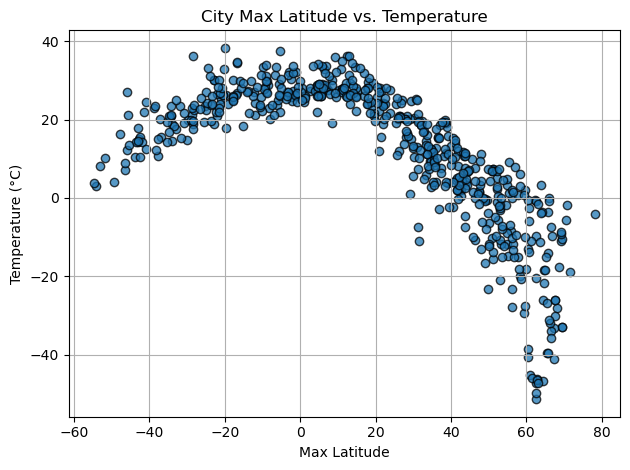

In [12]:
city_data_df = pd.DataFrame(city_data)

# Build scatter plot for latitude vs. temperature for all cities
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature')
plt.xlabel('Max Latitude')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.savefig("../output_data/fig1.png")
plt.show()


# Latitude Vs. Humidity¶

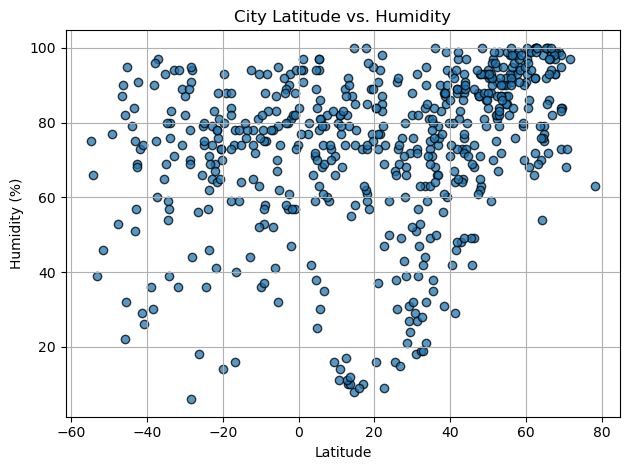

In [13]:
city_data_df = pd.DataFrame(city_data)

plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black', alpha=0.75)
# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/fig2.png")
plt.show()

# Latitude Vs. Cloudiness

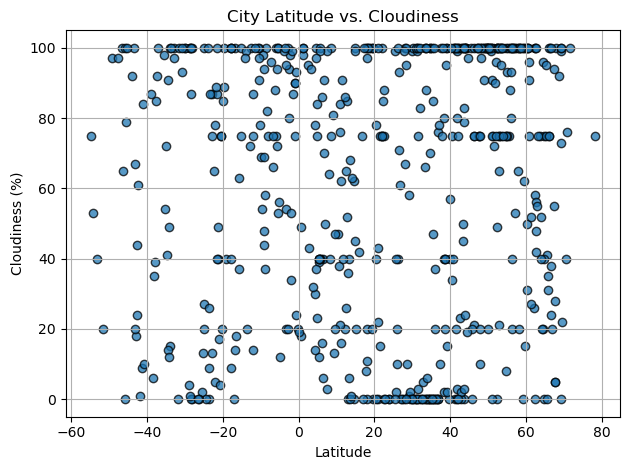

In [29]:
city_data_df = pd.DataFrame(city_data)
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/fig3.png")
plt.show()

# Latitude vs. Wind Speed Plot

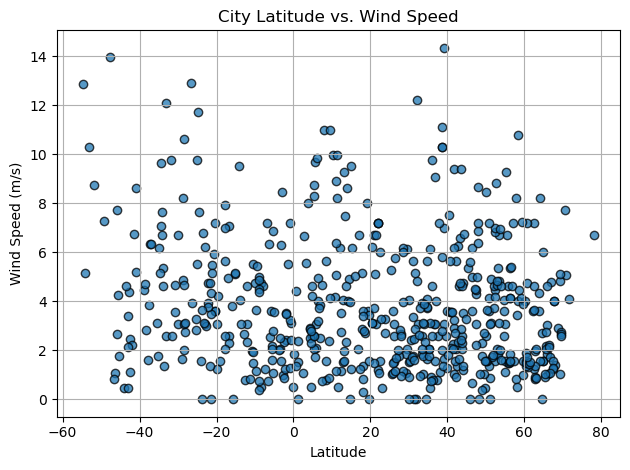

In [30]:
city_data_df = pd.DataFrame(city_data)
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/fig4.png")
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


# Northern Hemisphere: Temperature vs. Latitude


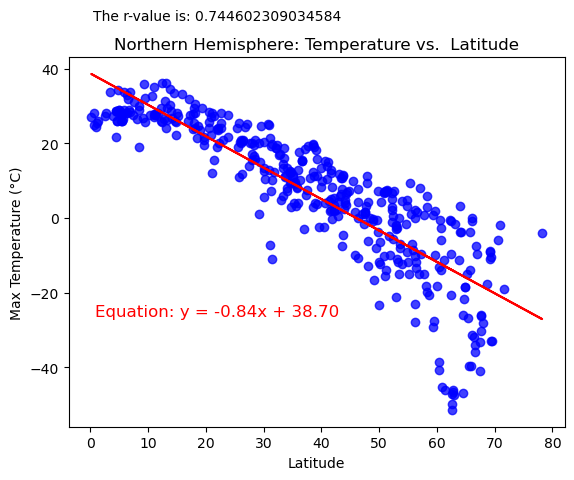

In [37]:

# Define the function
def create_linear_regression_northern_hemisphere(df, x_column, y_column, x_label, y_label, title):
    # Filter data for the Northern Hemisphere (latitude >= 0)
    northern_df = df[df['Lat'] >= 0]

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(northern_df[x_column], northern_df[y_column])

    # Create a scatter plot
    plt.scatter(northern_df[x_column], northern_df[y_column], color='blue', alpha=0.75)

    # Plot the regression line
    regression_line = f'Regression Line: y = {slope:.2f}x + {intercept:.2f}'
    plt.plot(northern_df[x_column], intercept + slope * northern_df[x_column], color='red', label=regression_line)

    # Set labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Display R-squared value 
    r_squared = f'The r-value is: {r_value**2:0.15f}'
    plt.text(0.05, 1.1, r_squared, transform=plt.gca().transAxes, fontsize=10, color='black', ha='left')

    # Display regression line equation inside the plot
    equation_text = f'Equation: y = {slope:.2f}x + {intercept:.2f}'
    plt.text(0.3, 0.3, equation_text, transform=plt.gca().transAxes, fontsize=12, color='red', ha='center')

    # Show the plot
    plt.show()

city_data_df = pd.read_csv("../output_data/cities.csv")
create_linear_regression_northern_hemisphere(city_data_df, 'Lat', 'Max Temp','Latitude', 'Max Temperature (°C)', 'Northern Hemisphere: Temperature vs.  Latitude')


In [38]:
#  Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()


,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,4,choibalsan,48.0667,114.5000,-12.94,63,97,8.67,MN,1701786549
5,5,yellowknife,62.4560,-114.3525,-9.71,92,100,7.20,CA,1701786549
6,6,kapa'a,22.0752,-159.3190,24.18,85,75,7.20,US,1701786550
7,7,haiku-pauwela,20.9219,-156.3051,22.25,91,0,6.69,US,1701786550
8,8,nieuw amsterdam,5.8833,-55.0833,28.97,81,40,3.09,SR,1701786550


# Southern Hemisphere: Temperature vs. Latitude

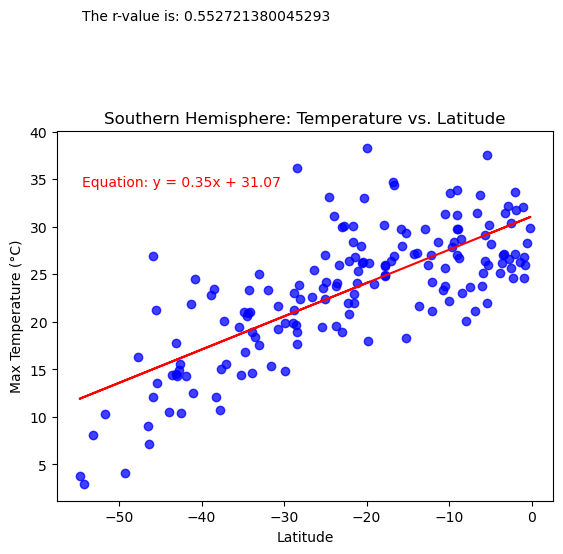

In [40]:
def create_linear_regression_southern_hemisphere(df, x_column, y_column, x_label, y_label, title):
    # Filter data for the Southern Hemisphere (latitude < 0)
    southern_df = df[df['Lat'] < 0]

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(southern_df[x_column], southern_df[y_column])

    # Create a scatter plot
    plt.scatter(southern_df[x_column], southern_df[y_column], color='blue', alpha=0.75)

    # Plot the regression line
    regression_line = f'Regression Line: y = {slope:.2f}x + {intercept:.2f}'
    plt.plot(southern_df[x_column], intercept + slope * southern_df[x_column], color='red', label=regression_line)

    # Set labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Display R-squared value 
    r_squared = f'The r-value is: {r_value**2:0.15f}'
    plt.text(0.05, 1.3, r_squared, transform=plt.gca().transAxes, fontsize=10, color='black', ha='left')

    # Display regression line equation inside the plot
    equation_text = f'Equation: y = {slope:.2f}x + {intercept:.2f}'
    plt.text(0.05, 0.85, equation_text, transform=plt.gca().transAxes, fontsize=10, color='red', ha='left')

# Read the data outside the function
city_data_df = pd.read_csv("../output_data/cities.csv")

# Call the function
create_linear_regression_southern_hemisphere(
    city_data_df, 'Lat', 'Max Temp', 'Latitude', 'Max Temperature (°C)', 'Southern Hemisphere: Temperature vs. Latitude'
)

# Show the plot outside the function
plt.show()


In [41]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,port mathurin,-19.6833,63.4167,26.17,80,89,4.20,MU,1701786409
1,1,punta arenas,-53.1500,-70.9167,8.06,39,40,10.29,CL,1701786549
2,2,puerto natales,-51.7236,-72.4875,10.25,46,20,8.75,CL,1701786549
3,3,port-aux-francais,-49.3500,70.2167,4.12,77,97,7.28,TF,1701786549
13,13,waitangi,-43.9535,-176.5597,10.46,79,92,0.45,NZ,1701786552


# Humidity vs. Latitude Linear Regression Plot

# Northern Hemisphere

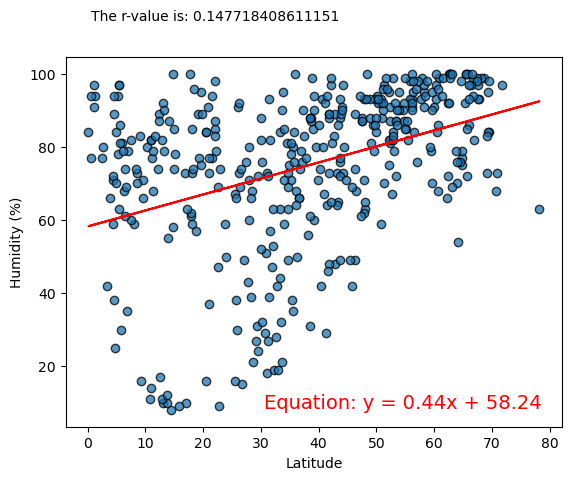

In [42]:

northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Scatter plot for Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], edgecolors='black', alpha=0.75)

# Perform linear regression for Northern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

# Plot the regression line
regression_line = f'Regression Line: y = {slope:.2f}x + {intercept:.2f}'
plt.plot(northern_hemi_df['Lat'], intercept + slope * northern_hemi_df['Lat'], color='red', label=regression_line)

# Set labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Include R-squared value in the plot
r_squared = f'The r-value is: {r_value**2:0.15f}'
plt.text(0.05, 1.1, r_squared, transform=plt.gca().transAxes, fontsize=10, color='black', ha='left')

# Display regression line equation inside the plot
equation_text = f'Equation: y = {slope:.2f}x + {intercept:.2f}'
plt.text(0.4, 0.05, equation_text, transform=plt.gca().transAxes, fontsize=14, color='red', ha='left')

# Show the plot
plt.show()


# Southern Hemisphere

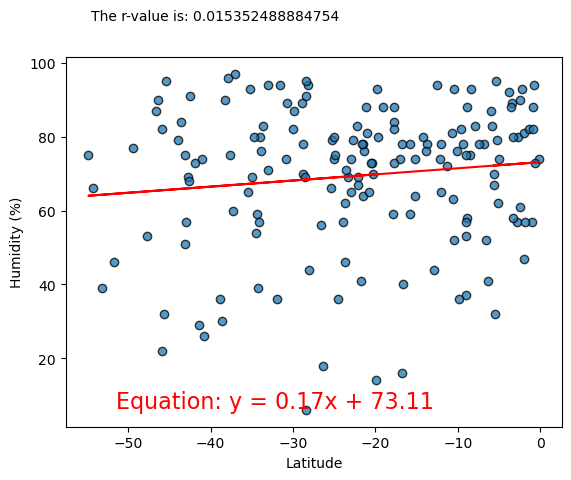

In [44]:
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Scatter plot for Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], edgecolors='black', alpha=0.75)

# Perform linear regression for Southern Hemisphere
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

# Plot the regression line
regression_line = f'Regression Line: y = {slope:.2f}x + {intercept:.2f}'
plt.plot(southern_hemi_df['Lat'], intercept + slope * southern_hemi_df['Lat'], color='red', label=regression_line)

# Set labels
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Include R-squared value in the plot
r_squared = f'The r-value is: {r_value**2:0.15f}'
plt.text(0.05, 1.1, r_squared, transform=plt.gca().transAxes, fontsize=10, color='black', ha='left')

# Display regression line equation inside the plot
equation_text = f'Equation: y = {slope:.2f}x + {intercept:.2f}'
plt.text(0.1, 0.05, equation_text, transform=plt.gca().transAxes, fontsize=16, color='red', ha='left')

# Show the plot
plt.show()


# Cloudiness vs. Latitude Linear Regression Plot

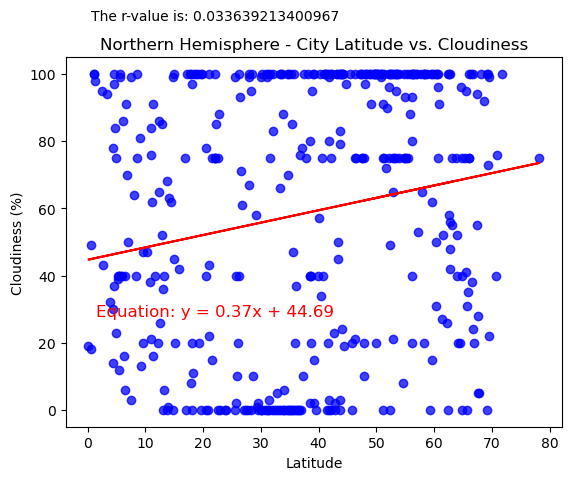

In [51]:

def create_linear_regression_plot(x, y, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Create a scatter plot
    plt.scatter(x, y, color='blue', alpha=0.75)

    # Plot the regression line
    regression_line = f'Regression Line: y = {slope:.2f}x + {intercept:.2f}'
    plt.plot(x, intercept + slope * x, color='red', label=regression_line)

    # Set labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    # Display R-squared value
    r_squared = f'The r-value is: {r_value**2:0.15f}'
    plt.text(0.05, 1.1, r_squared, transform=plt.gca().transAxes, fontsize=10, color='black', ha='left')

    # Display regression line equation inside the plot
    equation_text = f'Equation: y = {slope:.2f}x + {intercept:.2f}'
    plt.text(0.3, 0.3, equation_text, transform=plt.gca().transAxes, fontsize=12, color='red', ha='center')


northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Use the create_linear_regression_plot function
create_linear_regression_plot(
    northern_hemi_df['Lat'],  # x-axis: Latitude
    northern_hemi_df['Cloudiness'],  # y-axis: Cloudiness
    'Latitude',  # x-axis label
    'Cloudiness (%)',  # y-axis label
    'Northern Hemisphere - City Latitude vs. Cloudiness'  # plot title
)
 # Show the plot
plt.show()


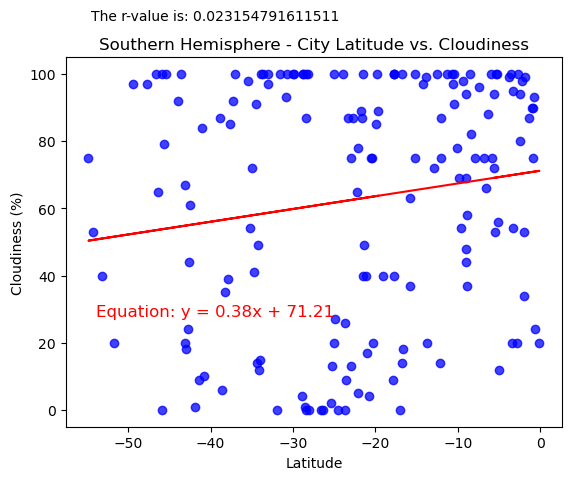

In [52]:
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Use the create_linear_regression_plot function
create_linear_regression_plot(
    southern_hemi_df['Lat'],  # x-axis: Latitude
    southern_hemi_df['Cloudiness'],  # y-axis: Cloudiness
    'Latitude',  # x-axis label
    'Cloudiness (%)',  # y-axis label
    'Southern Hemisphere - City Latitude vs. Cloudiness'  # plot title
)


### Wind Speed vs. Latitude Linear Regression Plot

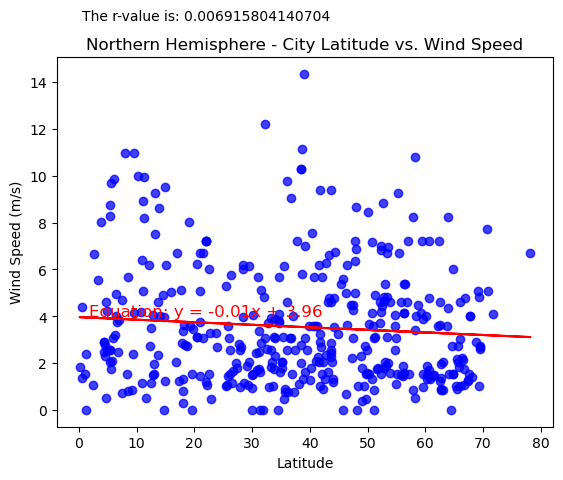

In [54]:
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Create_linear_regression_plot function
create_linear_regression_plot(
    northern_hemi_df['Lat'],  # x-axis: Latitude
    northern_hemi_df['Wind Speed'],  # y-axis: Wind Speed
    'Latitude',  # x-axis label
    'Wind Speed (m/s)',  # y-axis label
    'Northern Hemisphere - City Latitude vs. Wind Speed'  # plot title
)


In [55]:
The negative coefficient of -0.02 indicates a negative relationship between Latitude and Wind Speed 
in the Northern Hemisphere. The negative coefficient suggests that as you move towards higher latitudes
in the Northern Hemisphere, Wind Speed tends to decrease.

SyntaxError: invalid syntax (2396047512.py, line 1)

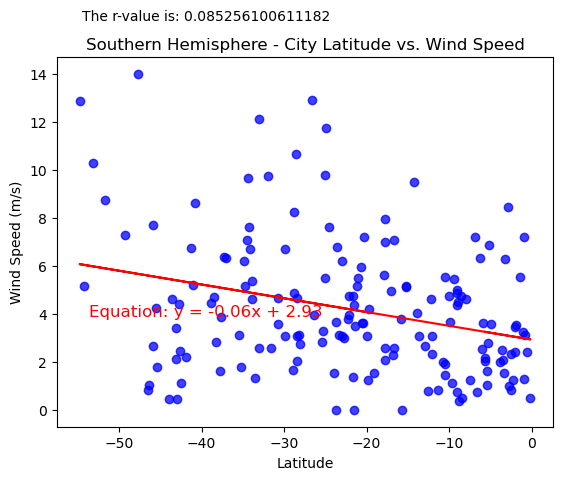

In [56]:
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Use the create_linear_regression_plot function
create_linear_regression_plot(
    southern_hemi_df['Lat'],  # x-axis: Latitude
    southern_hemi_df['Wind Speed'],  # y-axis: Wind Speed
    'Latitude',  # x-axis label
    'Wind Speed (m/s)',  # y-axis label
    'Southern Hemisphere - City Latitude vs. Wind Speed'  # plot title
)
